In [1]:
!git clone https://github.com/alihuss1017/KantoDex.git

Cloning into 'KantoDex'...
remote: Enumerating objects: 183, done.
remote: Counting objects: 100% (183/183), done.
remote: Compressing objects: 100% (150/150), done.
remote: Total 183 (delta 33), reused 178 (delta 32), pack-reused 0 (from 0)
Receiving objects: 100% (183/183), 1.13 MiB | 3.12 MiB/s, done.
Resolving deltas: 100% (33/33), done.


In [2]:
!pip install -r KantoDex/requirements.txt

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [3]:
import kagglehub
import os

os.environ['KAGGLEHUB_CACHE'] = os.getcwd()
path = kagglehub.dataset_download("mikoajkolman/pokemon-images-first-generation17000-files")


100%|██████████| 2.81G/2.81G [00:23<00:00, 129MB/s]

Extracting files...


In [4]:
import shutil

src_dir = os.path.join('datasets', 'mikoajkolman', 'pokemon-images-first-generation17000-files', 'versions', '1', 'pokemon')
dest_dir = os.path.join('data')

os.makedirs(dest_dir, exist_ok=True)

for folder in os.listdir(src_dir):
    src_path = os.path.join(src_dir, folder)
    dest_path = os.path.join(dest_dir, folder)

    if os.path.isdir(src_path):
        shutil.move(src_path, dest_path)


In [5]:
rm -rf datasets

In [6]:
import torch
import fastai

### Data Augmentation and Dataloaders

In [7]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

data_trans = transforms.Compose([
              transforms.Resize((224,224)),
              transforms.RandomHorizontalFlip(),
              transforms.RandomRotation(15),
              transforms.ToTensor(),
              transforms.Normalize(mean = [0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])])

dataset = datasets.ImageFolder(root = "data/", transform = data_trans)

train_size = int(len(dataset) * 0.8)
dev_size = int(len(dataset) - train_size)

train_set, dev_set = random_split(dataset, [train_size, dev_size])

batchSize = 32

train_loader = DataLoader(train_set, batch_size = batchSize, shuffle = True)
dev_loader = DataLoader(dev_set, batch_size = batchSize, shuffle = False)

In [8]:
device = ('cuda' if torch.cuda.is_available() else 'cpu')

### Displaying Training Images

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


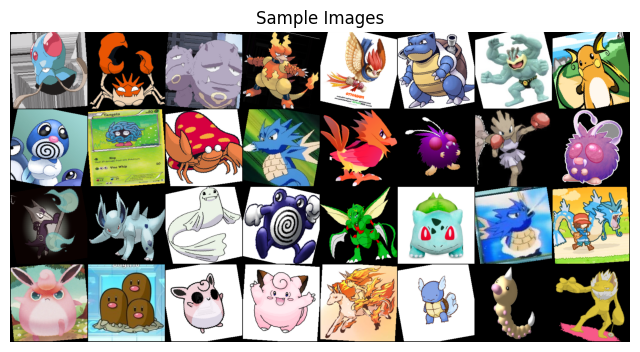

In [9]:
import torchvision.utils as vutils
import matplotlib.pyplot as plt
import numpy as np

batch = next(iter(train_loader))
plt.figure(figsize = (8,8))
plt.axis("off")
plt.title("Sample Images")
plt.imshow(np.transpose(vutils.make_grid(batch[0].to(device)[:64], padding = 2, normalize = True).cpu(), (1,2,0)))

### Transfer Learning with ResNet101

In [10]:
import torchvision.models as models
import torch.nn as nn
model = models.resnet18(pretrained = True)
model.fc = nn.Sequential(nn.Linear(512, 256),
                         nn.ReLU(),
                         nn.Linear(256, 150, bias = True))
model = model.to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 178MB/s]


In [11]:
for param in model.parameters():
    param.requires_grad = False

for param in model.layer4.parameters():
    param.requires_grad = True

### Training Model

In [12]:
import torch.optim as optim
optimizer = optim.Adam(model.parameters(), lr = .01)
criterion = nn.CrossEntropyLoss()

In [13]:
num_epochs = 5

for epoch in range(num_epochs):
    epoch_loss = 0.0

    for inputs, labels in train_loader:

        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)

        loss = criterion(outputs, labels)
        epoch_loss += loss.item()

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()


    print(f'Epoch : {epoch + 1} Loss: {epoch_loss / len(train_loader)}')

Epoch : 1 Loss: 2.9693200109080022
Epoch : 2 Loss: 1.0393883226930951
Epoch : 3 Loss: 0.5778636616309676
Epoch : 4 Loss: 0.4129987329280694
Epoch : 5 Loss: 0.2950795689602236


### Saving Model

In [14]:
torch.save(model.state_dict(), 'pokemodel.pt')

### Evaluating Model

In [15]:
def eval_model(model):
    correct = 0
    total = 0
    with torch.no_grad():
        for i, data in enumerate(dev_loader, 0):
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_acc = 100.0 * correct / total
    print(f'Accuracy of model on test images: {test_acc}')
    return test_acc

In [16]:
eval_model(model)

Accuracy of model on test images: 88.14073400060661


88.14073400060661

In [29]:
cd /content/KantoDex/src

/content/KantoDex/src


In [30]:
!npm install localtunnel

⠙⠹⠸⠼⠴⠦
up to date, audited 23 packages in 775ms
⠦
⠦3 packages are looking for funding
⠦  run `npm fund` for details
⠦
2 high severity vulnerabilities

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.
⠦

In [32]:
!streamlit run app.py &>/content/logs.txt & npx localtunnel --port 8501 & curl ipv4.icanhazip.com

34.125.18.233
⠙your url is: https://brown-flowers-kick.loca.lt


In [20]:
!git config --global user.email "alihuss1017@gmail.com"
!git config --global user.name "alihuss1017"